In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

We will work on MNIST dataset.

In [4]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
    ,])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',
                          download=True, 
                          train=True,
                          transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True)

100.1%

Extracting /home/burak/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /home/burak/.pytorch/MNIST_data/MNIST/raw


28.4%

0.5%5%

Extracting /home/burak/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/burak/.pytorch/MNIST_data/MNIST/raw


100.4%

Extracting /home/burak/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/burak/.pytorch/MNIST_data/MNIST/raw


180.4%

Extracting /home/burak/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/burak/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


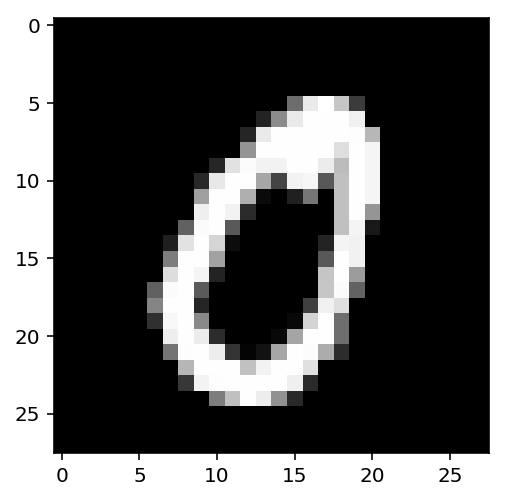

In [7]:
# this is what one of the images looks like
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

**Exercise**

Flatten the batch of images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. Use a sigmoid for the hidden layer. Leave the output layer without an activation.

In [11]:
def activation(x):
    """
    Sigmoid activation function
    
    Arguments:
    ----------
    x: torch.Tensor
    """
    return 1/(1 + torch.exp(-x))

In [16]:
# Set seed
torch.manual_seed(7)

new_images = images.view(images.shape[0], images.shape[2]* images.shape[3])

n_input = new_images.shape[1]
n_hidden = 256
n_output = 10

# Weights for inputs  to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

# output of this network, should have shape (64,10)
# out = 
hidden_output = activation(torch.mm( new_images, W1) + B1)

out = torch.mm(hidden_output, W2) + B2
print(output)

tensor([[-1.3186e+01, -5.2869e+00, -1.0274e+00, -1.6740e+01,  3.2063e+00,
          3.1632e+00, -1.1621e+01,  6.8253e+00, -7.7569e+00,  9.2609e-01],
        [-1.5823e+01, -1.7527e+01, -5.4647e+00, -8.0834e+00,  3.8156e+00,
          7.0907e+00, -1.2223e+01,  7.3206e+00, -9.8826e+00,  1.6660e+00],
        [-2.1080e+01, -4.3867e+00, -2.6884e+00, -5.8596e+00,  1.6368e+00,
          8.5140e+00, -6.2207e+00, -1.3904e+00, -7.6963e+00, -2.5249e+00],
        [-1.0299e+01, -8.7972e+00,  2.7784e-02, -2.5853e+00,  9.7968e+00,
          1.1251e+01, -8.0748e+00,  3.9160e+00, -1.1829e+01,  6.3546e+00],
        [-2.4729e+00, -5.9470e+00, -3.4232e-01, -1.2412e+01,  4.3817e+00,
          1.4825e+01, -8.1368e+00, -6.5531e-01, -8.5463e+00,  6.5399e-01],
        [-2.3483e+00, -1.8648e+00, -4.7596e+00, -1.2813e+00,  1.4123e+01,
          7.9988e+00, -1.1193e+01,  4.7217e+00, -7.5940e+00, -8.2192e+00],
        [-1.7440e+01, -6.2234e+00,  2.0982e+00, -1.3586e+00,  3.6512e+00,
          1.1087e+00,  1.7675e+0

In [17]:
out.shape

torch.Size([64, 10])

**Exercise** implement a function softmax. We'll need to define the *dim* keyword in *torch.sum*. Setting *dim=0* takes the sum across the rows while *dim=1* takes the sum across the columns.

In [23]:
def softmax(x):
    # Implement here
    denominator = torch.exp(x).sum(dim=1)
    #print(torch.exp(x).shape)
    #print(torch.exp(x).sum(dim=1).view()shape)
    return torch.exp(x) / denominator.view(denominator.shape[0],1)
    
# Out should be the output of the network in the
# previous excercise with shape (64,10)
probabilities = softmax(out)

# should be (64,10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Building networks with PyTorch

In [24]:
from torch import nn

In [32]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units, one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of
        # our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [37]:
# Create the network and look at it's text
# representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

Alternatively, we can use **torch.nn.functional** module

In [36]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

**Build a Network**

**Exercise**

Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activations.

In [38]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer, linear transformation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # fc1 layer with relu
        x = F.relu(self.fc1(x))
        # fc2 layer with relu
        x = F.relu(self.fc2(x))
        # output with softmax
        x = F.softmax(self.output(x), dim=1)
        
        return x

## Initializing weights and biases

In [48]:
model = Network()
print(model.fc1.weight)
print(model.fc2.bias)

Parameter containing:
tensor([[ 0.0265,  0.0073, -0.0200,  ...,  0.0182,  0.0310, -0.0186],
        [ 0.0134, -0.0313,  0.0107,  ...,  0.0288,  0.0025, -0.0077],
        [ 0.0091,  0.0259,  0.0257,  ..., -0.0030,  0.0350, -0.0161],
        ...,
        [ 0.0339, -0.0339, -0.0133,  ...,  0.0262,  0.0317, -0.0347],
        [ 0.0114, -0.0267,  0.0357,  ..., -0.0292,  0.0125, -0.0015],
        [ 0.0004, -0.0204,  0.0125,  ...,  0.0345, -0.0294, -0.0211]],
       requires_grad=True)
Parameter containing:
tensor([-0.0686,  0.0338,  0.0374,  0.0400, -0.0335,  0.0867,  0.0559, -0.0514,
         0.0054,  0.0804,  0.0169, -0.0756,  0.0319, -0.0130, -0.0491, -0.0475,
        -0.0385, -0.0208, -0.0223, -0.0240, -0.0442,  0.0342,  0.0073, -0.0357,
         0.0449, -0.0214,  0.0412, -0.0822, -0.0714, -0.0088,  0.0707,  0.0673,
        -0.0083, -0.0741,  0.0546, -0.0667,  0.0690,  0.0138,  0.0302, -0.0521,
         0.0556,  0.0337, -0.0722, -0.0419,  0.0598, -0.0444, -0.0577,  0.0685,
         0.0283

In [49]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
print(model.fc1.bias)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [52]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-1.0818e-02,  1.5055e-02, -1.3669e-02,  ...,  1.3031e-02,
          5.2288e-03,  6.6340e-03],
        [ 7.9046e-03,  3.4376e-03, -6.7541e-03,  ...,  4.3974e-03,
          4.4993e-03, -4.6771e-03],
        [-1.0431e-03, -1.2761e-02, -5.8101e-03,  ...,  8.0413e-03,
         -6.6638e-03, -5.1466e-03],
        ...,
        [ 2.3400e-05,  2.4239e-03, -1.7866e-02,  ...,  1.9534e-02,
         -2.8555e-03, -1.5680e-02],
        [ 3.5450e-03, -5.6944e-03,  8.7198e-03,  ...,  3.4349e-03,
         -2.8740e-02,  5.4916e-03],
        [-9.4316e-04, -1.8207e-02,  5.9719e-03,  ..., -1.7853e-03,
         -7.4211e-03,  3.2420e-03]])

## Forward pass

In [56]:
# Grab some data
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]

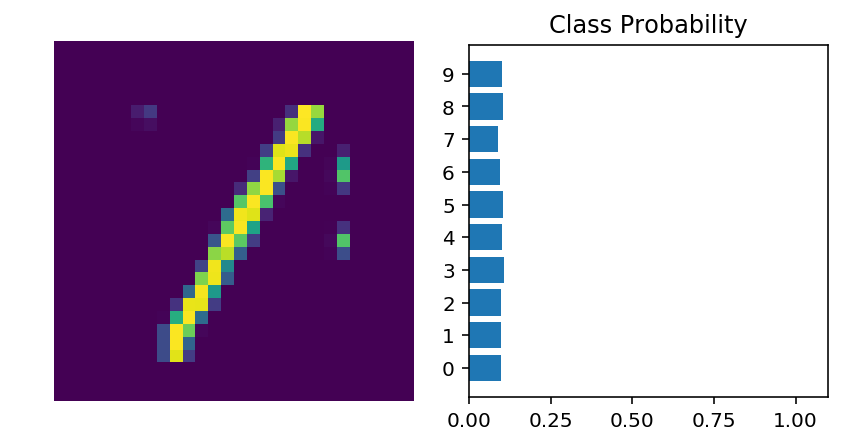

In [58]:
helper.view_classify(img.view(1, 28, 28), ps)

## Using nn.Sequential

It is an alternative way, as the 3rd option.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


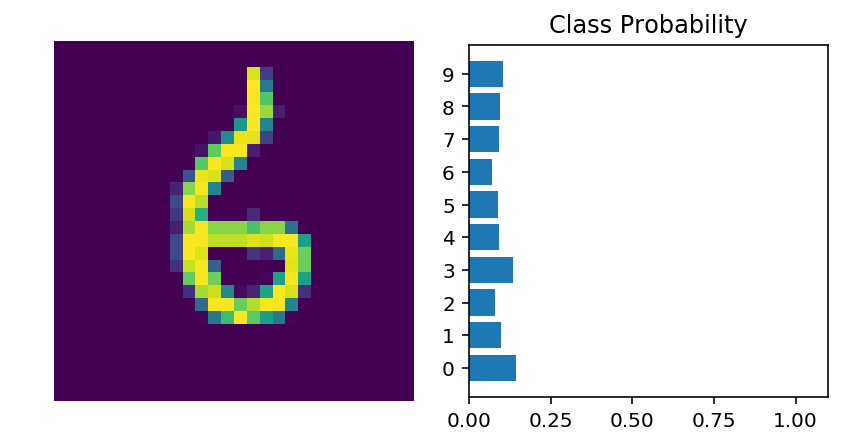

In [60]:
# Hyperparameters for our network
input_size = 784
hidden_size = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(
            nn.Linear(input_size, hidden_size[0]),
            nn.ReLU(),
            nn.Linear(hidden_size[0], hidden_size[1]),
            nn.ReLU(),
            nn.Linear(hidden_size[1], output_size),
            nn.Softmax(dim=1)
        )

print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

The operations are available by passing in the appropriate index.

In [62]:
print(model[1])

ReLU()


We can also pass in an *OrderedDict* to name the indiviual layers and operations. Note that dictionary keys must be unique.

In [63]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(hidden_size[1], output_size)),
    ('softmax', nn.Softmax(dim=1))
]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now we can access layers either by integer or the name

In [64]:
print(model.fc1)
print(model[0])

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
